In [1]:
import numpy as np
import pandas as pd
import re
#import nltk
#from nltk.stem.porter import PorterStemmer
from datasets import load_dataset
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#from nltk.corpus import stopwords

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_en_hi = load_dataset("open_subtitles", "en-hi")
dataset_da_ru = load_dataset("open_subtitles", "da-ru")

In [3]:
data_en_hi = dataset_en_hi["train"]
data_da_ru = dataset_da_ru["train"]

In [10]:
data_en_hi[0:2]

{'id': ['0', '1'],
 'meta': [{'year': 1948,
   'imdbId': 40522,
   'subtitleId': {'en': 4180294, 'hi': 4239106},
   'sentenceIds': {'en': [1], 'hi': [1]}},
  {'year': 1948,
   'imdbId': 40522,
   'subtitleId': {'en': 4180294, 'hi': 4239106},
   'sentenceIds': {'en': [2], 'hi': [2]}}],
 'translation': [{'en': 'THE BICYCLE THIEF', 'hi': 'साइकिल चोर'},
  {'en': 'Ricci?', 'hi': 'रिच्ची?'}]}

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


PCA Components:
[[-0.5138568   1.6179066 ]
 [-0.4985605   2.3255742 ]
 [-1.2910504   0.16675173]
 ...
 [ 1.7168239  -0.21043271]
 [ 2.0133264  -0.4722288 ]
 [ 0.26334557  1.1752908 ]]
Cluster Labels:
[0 0 0 ... 1 1 0]


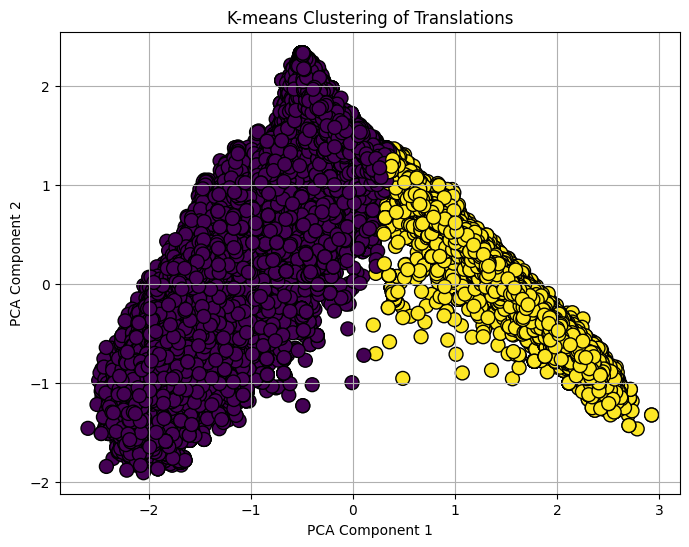

In [21]:
from gensim.models import Word2Vec

english_texts = [item['en'] for item in data_en_hi['translation']]
hindi_texts = [item['hi'] for item in data_en_hi['translation']]


# Concatenate English and Hindi texts
all_sentences = english_texts + hindi_texts

# Tokenize sentences into words
tokenized_sentences = [sentence.split() for sentence in all_sentences]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=1)

# Aggregate word vectors to represent each text
word_vectors = []
for sentence in tokenized_sentences:
    vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
    if vectors:
        aggregated_vector = np.mean(vectors, axis=0)
        word_vectors.append(aggregated_vector)

# Convert word vectors to array
word_vectors_array = np.array(word_vectors)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors_array)

# K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Results
print("PCA Components:")
print(principal_components)
print("Cluster Labels:")
print(cluster_labels)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100)
plt.title('K-means Clustering of Translations')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Labels:
[0 0 2 ... 1 1 0]


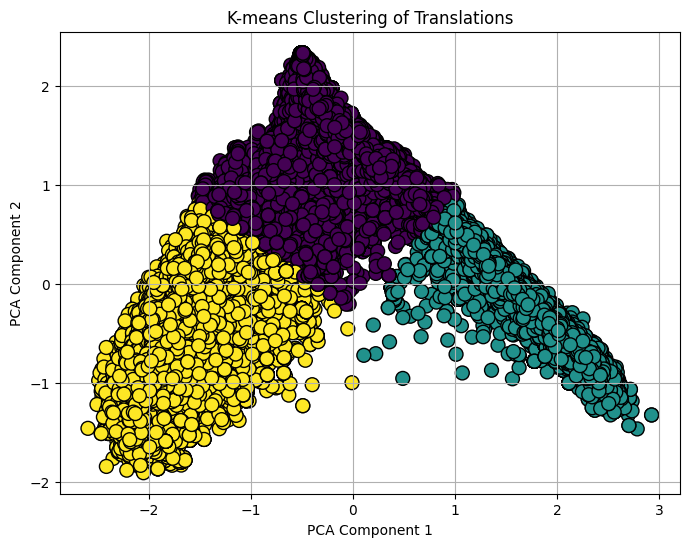

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Results
print("Cluster Labels:")
print(cluster_labels)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100)
plt.title('K-means Clustering of Translations')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


PCA Components:
[[-0.5138568   1.6179066 ]
 [-0.4985605   2.3255742 ]
 [-1.2910504   0.16675173]
 ...
 [ 1.7168239  -0.21043271]
 [ 2.0133264  -0.4722288 ]
 [ 0.26334557  1.1752908 ]]
Cluster Labels:
[0 0 2 ... 3 3 0]


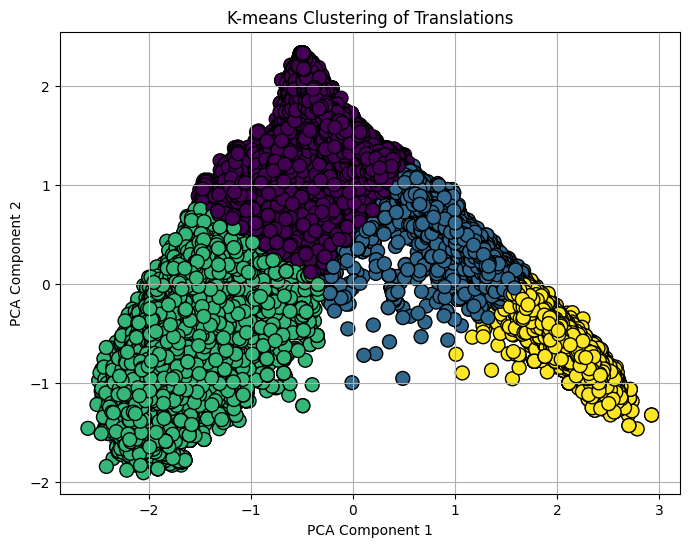

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Results
print("PCA Components:")
print(principal_components)
print("Cluster Labels:")
print(cluster_labels)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100)
plt.title('K-means Clustering of Translations')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

Numeric data without labels is needed for clustering. Given that the project uses textual data, the text data will be converted into a high-dimensional numerical format utilizing word2vec and PCA. This was done in an effort to decrease the dimensionality of the data while maintaining the greatest amount of variance.

In order to capture the semantic linkages between words, Word2Vec was utilized to produce dense vector representations for words based on their context. A common method in natural language processing (NLP) is called "word2vec," which creates distributed word representations in a continuous vector space.

The word vectors created were later used to apply PCA<link to PCA page> on.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

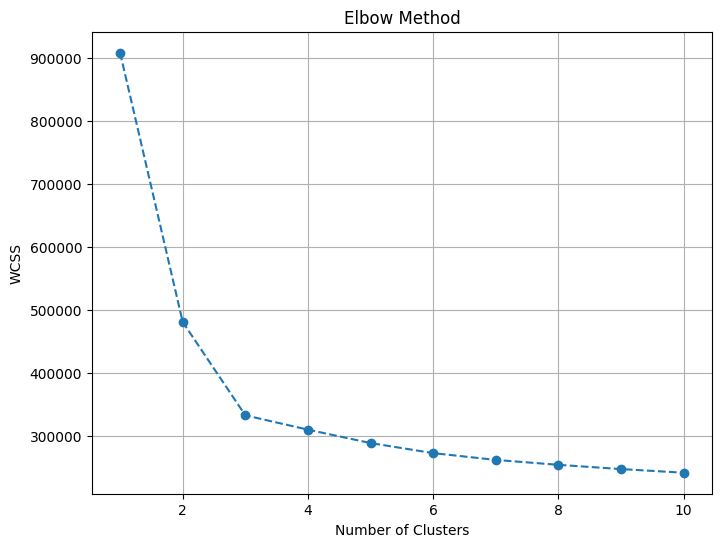

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# WCSS values for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(word_vectors_array)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

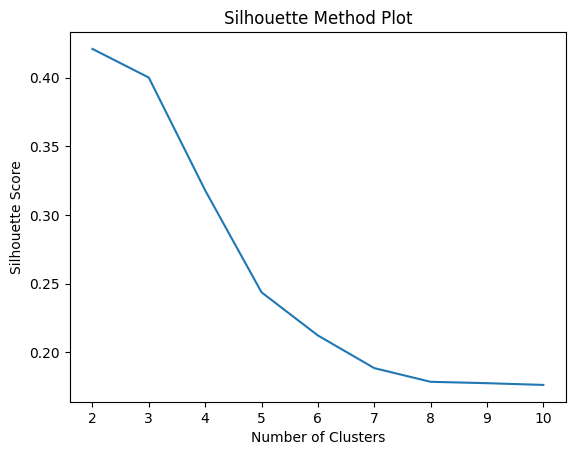

In [18]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_label = kmeans.fit_predict(word_vectors_array)
    avg_silhouette = silhouette_score(word_vectors_array, cluster_label)
    silhouette_scores.append(avg_silhouette)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()